<a href="https://colab.research.google.com/github/Sharvil-Turbadkar/Covid-19-Prediction-/blob/master/COVID_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID-19 Forecasting**
-----------
![COVID Forecasting](https://miro.medium.com/max/1400/0*2Hb-dGkPAZU_vUtW)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Importing all essential packages**
------------

In [11]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing,neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,r2_score,roc_curve,roc_auc_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import tree,linear_model
from sklearn import svm
import missingno as mn
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn import model_selection
from matplotlib.legend_handler import HandlerLine2D

In [12]:
data = pd.read_csv("/content/drive/My Drive/COVID-19 Prediction/covid19-global-forecasting-week-4/train.csv")

**EDA**
-----------

Storing a copy of data in df

In [13]:
df=data.copy()

Replacing NAN values with None in Province States 

In [14]:
df['Province_State']=df['Province_State'].fillna('None')

Viewing the first 10 rows 

In [15]:
df[1:5]

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
1,2,None,Afghanistan,2020-01-23,0.0,0.0
2,3,None,Afghanistan,2020-01-24,0.0,0.0
3,4,None,Afghanistan,2020-01-25,0.0,0.0
4,5,None,Afghanistan,2020-01-26,0.0,0.0


In [16]:
df.dtypes

Id                  int64
Province_State     object
Country_Region     object
Date               object
ConfirmedCases    float64
Fatalities        float64
dtype: object

In [17]:
df.shape

(35995, 6)

In [18]:
df['Province_State']=df['Province_State'].astype('str')

In [19]:
df.shape

(35995, 6)

In [20]:
confirmed_total_date = df.groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date = df.groupby(['Date']).agg({'Fatalities':['sum']})
total_date = confirmed_total_date.join(fatalities_total_date)

In [21]:
start=min(df['Date'])
end=max(df['Date'])

In [22]:
class style_bold:
  BOLD = '\033[1m'
  END = '\033[0m'

print( style_bold.BOLD + "Forecasting COVID-19 cases from %s" %start ,"to %s" %end + style_bold.END)  

Forecasting COVID-19 cases from 2020-01-22 to 2020-05-15


In [23]:
no_countries=df['Country_Region'].nunique()

print(style_bold.BOLD+"As of %s"%start,": COVID-19 has spread to %s"%no_countries,"Countries"+style_bold.END)

As of 2020-01-22 : COVID-19 has spread to 184 Countries


In [24]:
df.dtypes

Id                  int64
Province_State     object
Country_Region     object
Date               object
ConfirmedCases    float64
Fatalities        float64
dtype: object

In [25]:
df['Date']=pd.to_datetime(df['Date'])

**Time Series Analysis and Plots**
-----------------------

In [26]:
import plotly.express as px
covid_cases = df.groupby(['Date']).agg({'ConfirmedCases':['sum']})
covid_fatalities = df.groupby(['Date']).agg({'Fatalities':['sum']})


**Total Number of COVID-19 Cases by Date** 

In [27]:
fig=px.line(covid_cases,x=covid_cases.index,y=covid_cases['ConfirmedCases'],title="Number of Cases")
fig.show()

**Total COVID-19 Fatalities followinf the Linear Scale**

In [28]:
fig=px.line(covid_fatalities,x=covid_fatalities.index,y=covid_fatalities['Fatalities'],title="Number of Fatalities")
fig.show()

**Total COVID-19 Fatalities following the Log Scale**

In [29]:
fig=px.line(covid_fatalities,x=covid_fatalities.index,y=covid_fatalities['Fatalities'],title="Number of Fatalities",log_y=True)
fig.show()

In [30]:
df['ConfirmedCases']
base1=df.groupby(['Date','Country_Region'])['ConfirmedCases'].sum()
base2=df.groupby(['Date','Country_Region']).size().to_frame('Count')
covid_cases_country=pd.merge(base1,base2,left_index=True,right_index=True)

**Converting Indexes into Columns**

In [31]:
covid_cases_country= covid_cases_country.reset_index(level=['Date','Country_Region'])

In [32]:
covid_cases_country.shape

(21160, 4)

**Assessing impacts on severely affected counties using log scale** 

In [33]:
covid_cases_country=covid_cases_country[covid_cases_country['ConfirmedCases']>50000]

In [34]:
fig=px.line(covid_cases_country,x=covid_cases_country['Date'],y=covid_cases_country['ConfirmedCases'],line_group=covid_cases_country['Country_Region'],log_y=True)
fig.show()

In [35]:
base1=df.groupby(['Date','Country_Region'])['Fatalities'].sum()
base2=df.groupby(['Date','Country_Region']).size().to_frame('Count')
covid_fatalities_country=pd.merge(base1,base2,left_index=True,right_index=True)
covid_fatalities_country= covid_fatalities_country.reset_index(level=['Date','Country_Region'])
covid_fatalities_country=covid_fatalities_country[covid_fatalities_country['Fatalities']>5000]

In [36]:
fig=px.line(covid_fatalities_country,x=covid_fatalities_country['Date'],y=covid_fatalities_country['Fatalities'],line_group=covid_fatalities_country['Country_Region'],log_y=True)
fig.show()

**Resetting Indexes**

In [37]:
covid_cases_country=covid_cases_country.reset_index(drop=True)

**Calculating Growth Rates**
-----------------

In [38]:

growth_rate=[]
tot=df['ConfirmedCases'].count()
growth_rate.append(0/1)

for col in range(1,tot):
  growth=((df.ConfirmedCases[col]-df.ConfirmedCases[col-1])*100/(df.ConfirmedCases[col-1]))
  growth_rate.append(growth)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

divide by zero encountered in double_scalars



In [39]:
from pandas import DataFrame
growth_rate_df=DataFrame(growth_rate,columns=['Growth Rate'])

In [40]:
print(growth_rate_df.shape)
print(df.shape)

(35995, 1)
(35995, 6)


In [41]:
growth_rate_df['Growth Rate'].value_counts()

 0.000000      8230
 inf            288
-100.000000     287
 100.000000     166
 50.000000      151
               ... 
 4.424217         1
 8.663883         1
 0.673957         1
 13.375796        1
 13.339582        1
Name: Growth Rate, Length: 10573, dtype: int64

**Combining the two dataframes**

In [42]:
df['Growth_Rate']=growth_rate

In [43]:
growth_rate_df=df

**Dropping zeros and all NA and infinite values**

In [44]:
growth_rate_df=growth_rate_df.fillna(value=0)

In [45]:
growth_rate_df.shape

(35995, 7)

In [46]:
growth_rate_df=growth_rate_df[growth_rate_df['Growth_Rate']!=0]

In [47]:

growth_rate_df=growth_rate_df[growth_rate_df['Growth_Rate']!=np.inf]

In [48]:
growth_rate_df.head(5)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Growth_Rate
46,47,None,Afghanistan,2020-03-08,4.0,0.0,300.000000
48,49,None,Afghanistan,2020-03-10,5.0,0.0,25.000000
49,50,None,Afghanistan,2020-03-11,7.0,0.0,40.000000
52,53,None,Afghanistan,2020-03-14,11.0,0.0,57.142857
53,54,None,Afghanistan,2020-03-15,16.0,0.0,45.454545


To Gauge effects of COVID-19,20-day mean average of the gorwoth rate has been taken into consideration to capture the real effects 


---
This will give an accurate estiamte for inferring latest trends 


In [49]:
growth_rate_df=growth_rate_df[growth_rate_df['Date']>'2020-04-20 00:00:00']

In [50]:
base1=growth_rate_df.groupby(['Date','Country_Region'])['Growth_Rate'].mean()
base2=growth_rate_df.groupby(['Date','Country_Region']).size().to_frame('Count')
growth_rate_df=pd.merge(base1,base2,left_index=True,right_index=True)

**Resetting index** 

In [51]:
growth_rate_df= growth_rate_df.reset_index(level=['Date','Country_Region'])

In [52]:
growth_rate_df.shape

(3350, 4)

**Countries where COVID-19 could blow up** 

In [53]:
growth_rate_df.drop_duplicates(subset=['Country_Region'],inplace=True)

In [54]:
rising_trend=growth_rate_df.sort_values(by='Growth_Rate',ascending=False).head(10)

In [55]:


fig=px.bar(rising_trend,x=rising_trend['Country_Region'],y=rising_trend['Growth_Rate'])
fig.show()

In [56]:
falling_trend=growth_rate_df.sort_values(by='Growth_Rate',ascending=True).head(10)

**Countries where covid-19 effect is diminishing**

In [57]:
fig=px.bar(falling_trend,x=falling_trend['Country_Region'],y=falling_trend['Growth_Rate'])
fig.show()

**Number of Cases by Pie Chart**

In [58]:
fig=px.pie(covid_cases_country,names=covid_cases_country['Country_Region'],values=covid_cases_country['ConfirmedCases'],title="Number of COVID-19 Cases in the World")
fig.show()

**Number of Fatalities by Pie Chart**

***European Countires have a relatively Higher Death Ratio***

In [59]:
fig=px.pie(covid_fatalities_country,names=covid_fatalities_country['Country_Region'],values=covid_fatalities_country['Fatalities'],title="Number of COVID-19 Fatalities in the World")
fig.show()



**Case Study South Korea**

In [60]:
df[df['Country_Region']=='Korea, South']

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Growth_Rate
17480,17481,None,"Korea, South",2020-01-22,1.0,0.0,-99.871959
17481,17482,None,"Korea, South",2020-01-23,1.0,0.0,0.000000
17482,17483,None,"Korea, South",2020-01-24,2.0,0.0,100.000000
17483,17484,None,"Korea, South",2020-01-25,2.0,0.0,0.000000
17484,17485,None,"Korea, South",2020-01-26,3.0,0.0,50.000000
...,...,...,...,...,...,...,...
17590,17591,None,"Korea, South",2020-05-11,10936.0,258.0,0.247502
17591,17592,None,"Korea, South",2020-05-12,10962.0,259.0,0.237747
17592,17593,None,"Korea, South",2020-05-13,10991.0,260.0,0.264550
17593,17594,None,"Korea, South",2020-05-14,11018.0,260.0,0.245656


# **Predictions using Logistic Function**
---------------

Predictions for the late stages of the transmission (under construction)
As the transmission progresses, the exponential regime is left behind and the Linear Regressor  begins to predict worse results. Being aware of this limitation, now alternative methods are required in order to capture the new behavior.
Aim is to Predict future cases which are exponential and non linear thsu we make use of a logit curve to capture the exponential effect 

Models considered in this section:

1.   Logistic Curve Fit
2.   ARIMA Model



**For the Logistic Curve we consider the number of days passed since data tracking began as x and number of cases confirmed as y data**

In [61]:
from scipy.optimize import curve_fit
df['ConfirmedCases']
cases_by_date=pd.pivot_table(df,values=['ConfirmedCases'],index=['Date'],aggfunc='sum')

**In this formula, we have the variable x that is the time and three parameters: a,b,c.**

At high time values, the number of infected people gets closer and 

1. a refers to the infection speed
2. b is the day with the maximum infections occurred
3. c is the total number of recorded infected people at the infection’s peak

closer to c and that’s the point at which we can say that the infection has ended. This function has also an inflection point at b, that is the point at which the first derivative starts to decrease (i.e. the peak after which the infection starts to become less aggressive and decreases)

In [64]:
x_data=range(len(cases_by_date.index))
y_data=cases_by_date['ConfirmedCases']

*C is kept at infinity as the curve is exponenial* 

*Our main is to estimate the far reaching effects of this virus*

*Thus C has been kept at infinity*


In [65]:
def logistic(x,a,b,c):
    return c / (1 + np.exp(-(x-b)/a))

init_guess=([0,0,0],np.inf)
# Fit the curve
popt, pcov = curve_fit(logistic, x_data, y_data, bounds=init_guess, maxfev=60000)
estimated_a, estimated_b, c=popt

# Plot the fitted curve
a = estimated_a
b = estimated_b
y_fitted = logistic(range(0,130),a, b, c)

print("Infection Rate: %d"%a)

Infection Rate: 12


In [66]:
import datetime
from datetime import timedelta
start_date="01/01/20"

peak_date=datetime.datetime.strptime(start_date,"%d/%m/%y")
peak_date=peak_date+datetime.timedelta(days=b)
print("The Date when cases will reach peak are:%s"% peak_date)

print("Total Number of Cases as on :%s"% peak_date," will be : %d"%c)

The Date when cases will reach peak are:2020-03-30 03:08:35.169007
Total Number of Cases as on :2020-03-30 03:08:35.169007  will be : 4935807


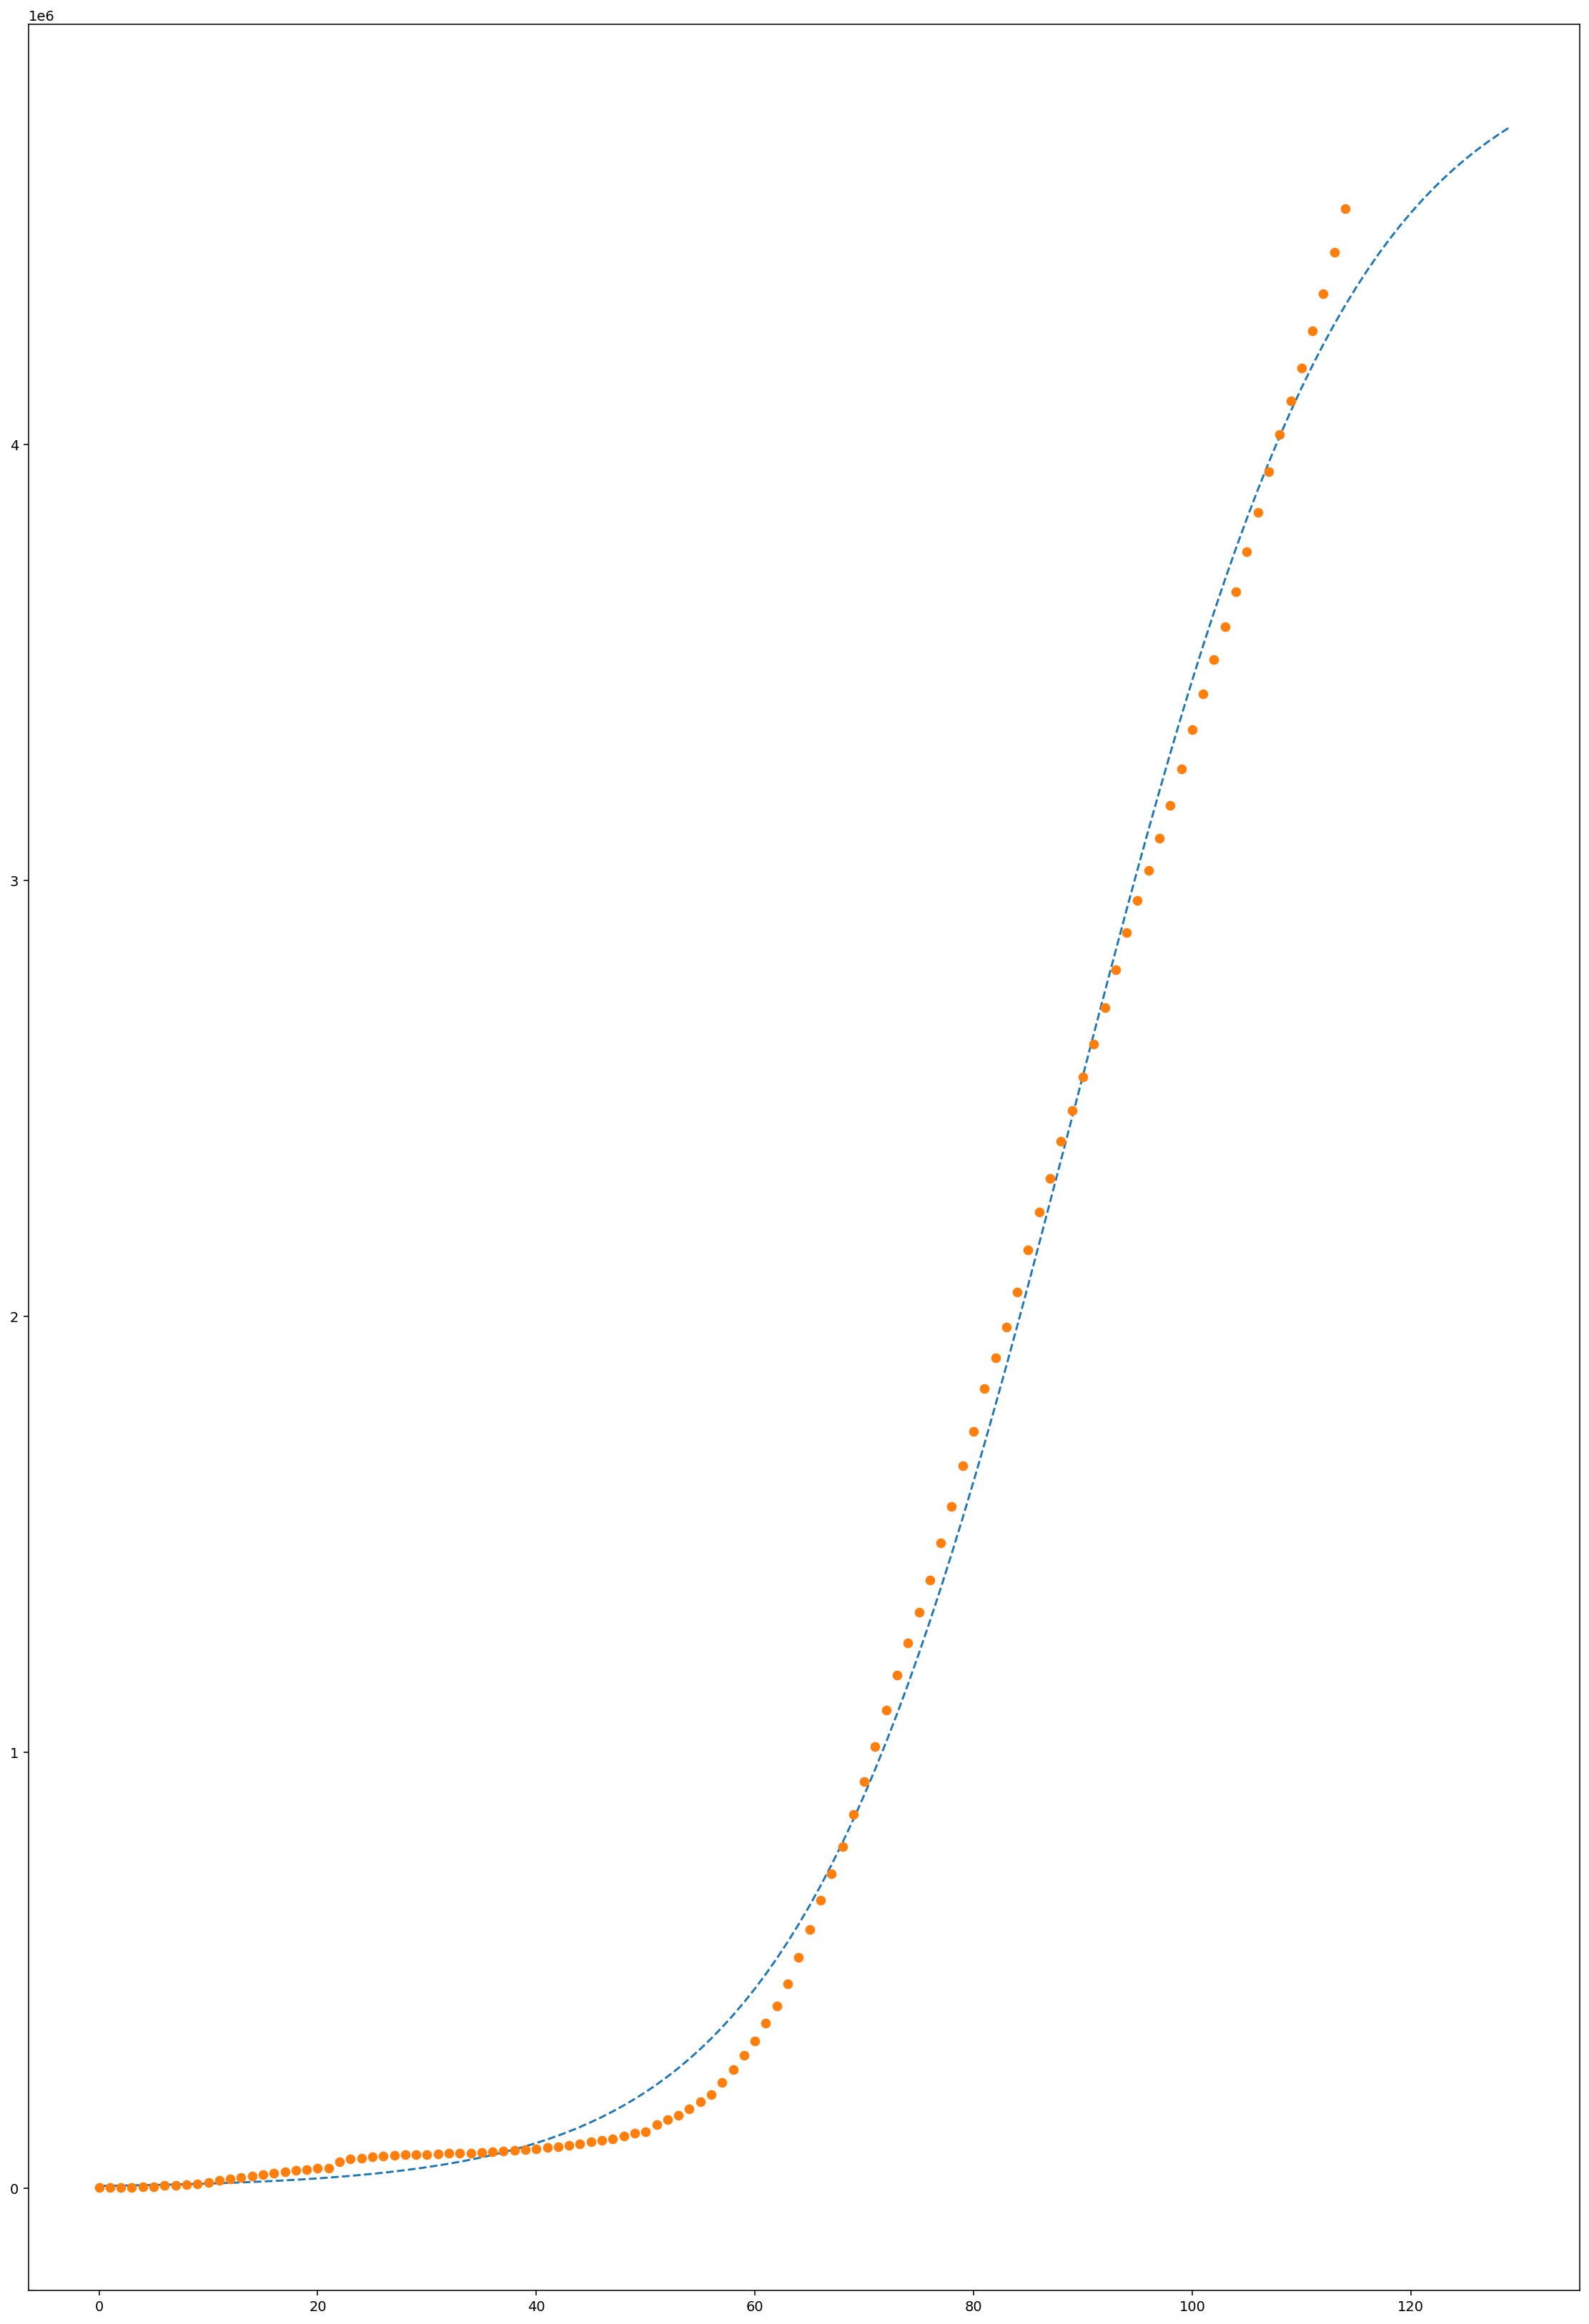

In [67]:
fig = plt.figure(figsize=(20,30),dpi=140)
ax = fig.add_subplot(111)
ax.plot(range(0,130), y_fitted, '--', label='fitted')
ax.plot(x_data, y_data, 'o', label='Confirmed Data')

**Dated as of 7th June the total number of cases have exceeded 4935807 and are now 7,035,561 This shows that the graph is in its exponential phase and has not reached the inflection point (The point where most number of cases will be recorded after which there will be a downward spiral in cases until it subsides gradually till it converges at a peak) ![alt text](https://miro.medium.com/max/1400/1*0ochuyizpvVdq4_ttN4p2g.png))** 



**Let us enlighten ourselves on a few key takeaways here** 

1.   Infection spreads Exponentially first 
2.   It reaches a point when cases reach peak which is called inflection point
3.  After reaching the inflection point growth Rate might increase on rare occasions but there is an average  decline in the number of cases 


As of 15th April the cases of COVID-19 in brazil are far lesser than anticipated.

**Countries Like Russia,India and Chile have exhibted teh same trend and since these trends were not accounted for in the main model our prediction was way off as a result we are still in the exponential phase of this pandemic** ![](https://cdn.statcdn.com/Infographic/images/normal/21730.jpeg)



```
According to the model fitted to the WHO’s data for cases outside China, the growth rate (r) is ~1.18564. 
However, since this model is exponential, it diverges to infinity over time, which is physically incorrect. 
As more people are infected, they are surrounded by people who are already been infected or have developed immunity. So there is a saturation point in the infected population. 
Typically, in order to predict the growth, another factor is multiplied to the right-hand-side of this exponential growth equation which constraints the exponential growth and recognizes the point of saturation.
```



# **SIR MODEL**
-------

**S: Population that is susceptible to the infection Susceptible (=All - Patients that do not have COVID-19)**

**I: Infected (=Confirmed-( Recovered + Fatalities)**

**R: Recovered or fatal(=Total Patients Recovered)=(Confirmed-Fatalities)**

In [68]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [69]:
pip install covid

In [70]:
from covid import Covid

In [71]:
usa_df=Covid(source='worldometers')

In [72]:
usa_df=usa_df.get_status_by_country_name('USA')

**Finding the Total Population of USA**

In [73]:
N=((usa_df['confirmed']/usa_df['total_cases_per_million']))
N=N*1000000
print(N)

330923829.2827504445761707172


In [74]:
N=float(N)

In [75]:
usa_df

{'active': 1200865,
 'confirmed': 2233074,
 'country': 'USA',
 'critical': 16654,
 'deaths': 119929,
 'new_cases': 24674,
 'new_deaths': 797,
 'population': Decimal('330928170'),
 'recovered': 912280,
 'total_cases_per_million': Decimal('6748'),
 'total_deaths_per_million': Decimal('362'),
 'total_tests': 26211238,
 'total_tests_per_million': Decimal('0')}

Our Aim is to find the **Initial Infected Iₒ and Initial recovered Rₒ** as of  2020-01-22 when recording began 

In [76]:
I0=pd.pivot_table(df,values=['ConfirmedCases','Fatalities'],index=['Date'],aggfunc='sum')
Izero=I0['ConfirmedCases'][0]

Since 0 cases were recorded 0 were recovered 
Thus the no one is susceptible

We Thus need to take into consideration population where we got more than one infected  

In [77]:
Izero=I0[I0['ConfirmedCases']>0]

In [79]:
Izero.head(2)

,ConfirmedCases,Fatalities
Date,,
2020-01-22,554.0,17.0
2020-01-23,653.0,18.0


In [80]:
beta=[]
tot=Izero['ConfirmedCases'].count()
beta.append(0/1)

for col in range(1,tot):
  rate=((Izero.ConfirmedCases[col] -Izero.ConfirmedCases[col-1])*100/(Izero.ConfirmedCases[col-1]))
  beta.append(rate)

In [81]:
I0=Izero['ConfirmedCases'][0]
R0=Izero['ConfirmedCases'][0]-Izero['Fatalities'][0]

In [82]:
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

In [83]:
pip install covid 

In [84]:
from covid import  Covid

**Calculating Recovery Rate and Comtact rate**

In [85]:
usa_df['recovered']/usa_df['confirmed']

0.40853102046774986

In [86]:
beta=DataFrame(beta)
beta.mean()

0    8.721993
dtype: float64

In [87]:
# Contact rate, beta, and mean recovery rate
beta, gamma = 0.0872,40./143

In [88]:
print(S0, I0, R0)

330922738.2827504 554.0 537.0


In [89]:
from datetime import date
end_date=date.today()
start_date=date(2020,1,22)
days=end_date-start_date
print(days)

147 days, 0:00:00


In [90]:
# A grid of time points (in days)
t = np.linspace(0,100,100)
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

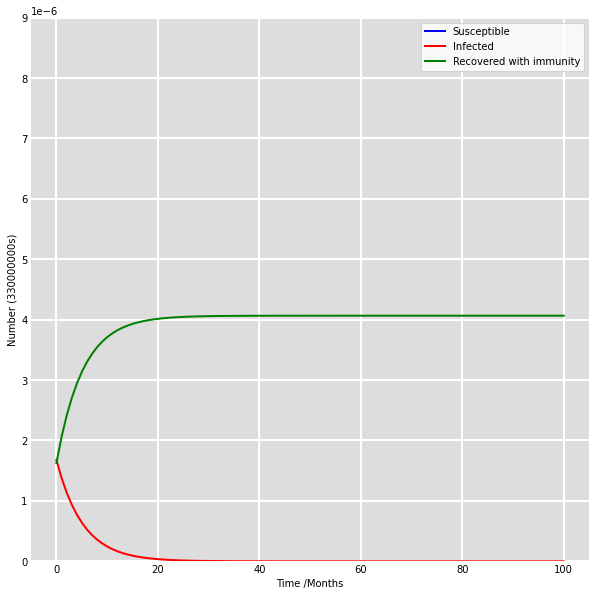

In [91]:
fig = plt.figure(facecolor='w',figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/330000000, 'b', lw=2, label='Susceptible')
ax.plot(t, I/330000000, 'r', lw=2, label='Infected')
ax.plot(t, R/330000000, 'g', lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /Months')
ax.set_ylabel('Number (330000000s)')
ax.set_ylim(0,0.000009)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# EDA using PyPI

In [92]:
pip install covid

In [93]:
from covid import Covid

In [94]:
df_worldometers=Covid(source='worldometers')